<a href="https://colab.research.google.com/github/ladino72/Hello-World/blob/main/double_slit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Double-slit interference example

This notebook creates a simple double-slit aperture and computes the far-field (Fraunhofer) diffraction pattern using an FFT. Change parameters like slit width, separation, wavelength, and screen distance to explore the pattern.

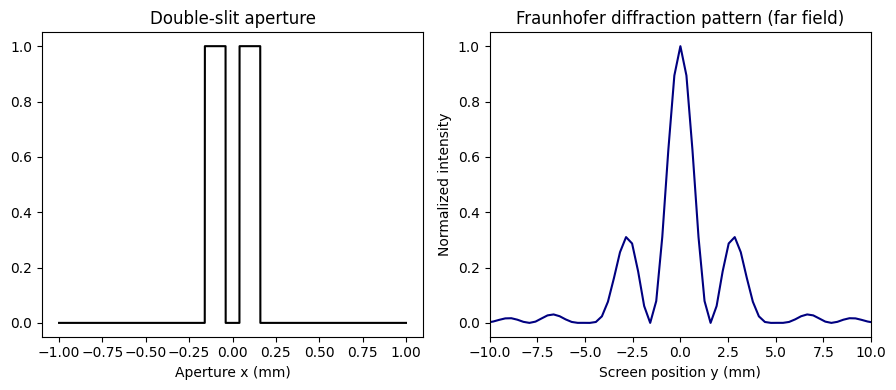

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
wavelength = 633e-9          # meters (HeNe laser)
slit_width = 120e-6           # slit width (m)
slit_sep = 200e-6            # center-to-center slit separation (m)
aperture_size = 2.0e-3       # total simulated aperture size (m)
screen_distance = 1.0        # distance to screen (m)
N = 8192                     # number of samples in aperture plane (power of two for FFT)

# Aperture plane
x = np.linspace(-aperture_size/2, aperture_size/2, N)
dx = x[1] - x[0]
aperture = np.zeros_like(x)
aperture[np.abs(x + slit_sep/2) < slit_width/2] = 1.0
aperture[np.abs(x - slit_sep/2) < slit_width/2] = 1.0

# Compute far-field using FFT (Fraunhofer approximation)
E = np.fft.fftshift(np.fft.fft(np.fft.ifftshift(aperture))) * dx
I = np.abs(E)**2
I = I / I.max()

# Map FFT frequencies to screen coordinates
fx = np.fft.fftshift(np.fft.fftfreq(N, d=dx))  # spatial frequency (1/m)
theta = np.arcsin(np.clip(wavelength * fx, -0.9999, 0.9999))  # observation angle
y = screen_distance * np.tan(theta)  # position on screen (m)

# Sort by y for plotting (fftfreq can wrap order)
order = np.argsort(y)
y_sorted = y[order]
I_sorted = I[order]

# Plot intensity map and cross-section
plt.figure(figsize=(9, 4))
plt.subplot(1,2,1)
plt.plot(x*1e3, aperture, color='black')
plt.xlabel('Aperture x (mm)')
plt.title('Double-slit aperture')

plt.subplot(1,2,2)
plt.plot(y_sorted*1e3, I_sorted, color='navy')
plt.xlim(-10, 10)  # show +/- 10 mm on screen (adjust as needed)
plt.xlabel('Screen position y (mm)')
plt.ylabel('Normalized intensity')
plt.title('Fraunhofer diffraction pattern (far field)')
plt.tight_layout()
plt.show()
